# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [1]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)
from scipy.stats import norm
import statistics as stats

### Load the dataset

Load the cleaned dataset.

In [2]:
#your code here
wnba = pd.read_csv('../data/wnba_clean.csv')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

### your answer here
- We could make the assumption that the WNBA is representative of all professional basketball leagues.
- Also assuming the sample is normally distributed.
- One way would be to run a 1 sample ttest and see if the actual mean is different from 67kg.

In [3]:
ttest_1samp(wnba['Weight'], 67)

Ttest_1sampResult(statistic=12.981385575989544, pvalue=7.635325397241363e-26)

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [4]:
# your code here
mu = wnba['Weight'].mean()
s = wnba['Weight'].std()

z = norm.interval(.95)
i = (mu - (z[1] * s), mu + (z[1] * s))
i

(57.42689286914671, 100.53085360972653)

**What can you say about these results?**

### your-answer-here
- We are 95% confident that the mean of WNBA basketball players falls within 57 to 100kg.

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

### your-answer-here
- She is well within the 95% confidence interval at 67 kg so it wouldn't be out of the question for her to play.
- If we want to include other professional leagues, there may even be a better chance given average weight in general may be less than America, however this is only an assumption and must still be tested.

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

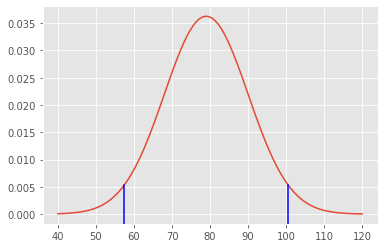

In [5]:
# your code here
plt.style.use('ggplot')
import seaborn as sns
from scipy.stats import chi2
x = np.linspace(40, 120, 100)
y = norm.pdf(x, mu, s)
sns.lineplot(x, y)
plt.axvline(i[0], 0, 0.18, color = 'blue')
plt.axvline(i[1], 0, 0.18, color = 'blue')

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

### your answer here
- We assume 2016-17 season is a random sample of professional female basketball players.
- Distirbution of the probability needs to be near normal.
- At least 10 players on both sides of specturm (over / under 40% misses).

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [6]:
wnba[wnba['FT%'] < 60].head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
11,Alyssa Thomas,CON,F,188,84,23.766410,US,"December 4, 1992",24,Maryland,3,28,833,154,303,50.8,0,3,0.0,91,158,57.6,34,158,192,136,48,11,87,399,4,0
14,Aneika Henry,ATL,F/C,193,87,23.356332,JM,"February 13, 1986",31,Florida,6,4,22,4,4,100.0,0,0,0.0,0,0,0.0,0,4,4,1,2,0,3,8,0,0
32,Cayla George,PHO,C,193,87,23.356332,AU,"April 20, 1987",30,Georgia,1,28,365,40,105,38.1,13,45,28.9,7,12,58.3,10,71,81,15,9,11,13,100,1,0
35,Clarissa dos Santos,SAN,C,185,89,26.004383,BR,"October 3, 1988",28,Brazil,4,7,52,8,14,57.1,1,1,100.0,0,0,0.0,3,7,10,7,1,1,5,17,0,0
36,Courtney Paris,DAL,C,193,113,30.336385,US,"September 21, 1987",29,Oklahoma,7,16,217,32,57,56.1,0,0,0.0,6,12,50.0,28,34,62,5,6,8,18,70,0,0


In [7]:
# your code here
x = len(wnba[wnba['FT%'] < 60].index)
n = len(wnba.index)
p = x / n
se = math.sqrt((p * (1 - p)) / n)

z = norm.interval(0.95)
i = (p - (se * z[1]), p + (se * z[1]))
i


(0.049558988317297346, 0.14762411027425193)

**What can you comment about our result? What would you tell your sister?**

### your-answer-here
- It is definitely not the majority who fail more than 40% of their free throws. We're 95% confident that the average proportion of players failing that much is only 5 - 15% of the total WNBA population.

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

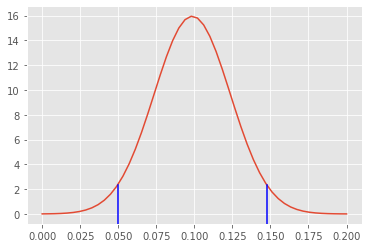

In [8]:
#your code here
x = np.linspace(0, 0.2, 50)
y = norm.pdf(x, p, se)
sns.lineplot(x, y)
plt.axvline(i[0], 0, 0.18, color = 'blue')
plt.axvline(i[1], 0, 0.18, color = 'blue')

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

### your-answer-here
- We assume the sample of means will be normally distributed, even if the population itself is not normally distributed since the sample is larger than 40.

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [9]:
#your code here
sample = wnba['AST']
pop_mean = 52

i = ttest_1samp(sample, pop_mean)
i

Ttest_1sampResult(statistic=-2.1499947192482898, pvalue=0.033261541354107166)

### your-answer-here
 - The p-value is under 5% so we reject the null hypothesis and accept that mean assists for wnba is different.

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

### your-answer-here
- We divide p-value by 2 and thus are still able to reject the null that they are the same but because the test-statistic is negative, we cannot conclude that it is greater than.

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

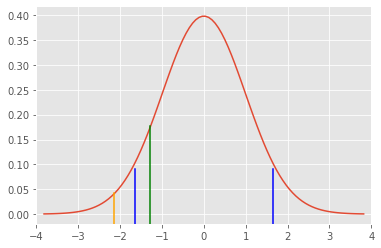

In [14]:
#your code here
from scipy.stats import t

stat = i[0]
dof = len(sample) - 1
alpha = 0.05
crit = t.ppf(q = 1-alpha, df = dof)
crit2 = t.ppf(q = 1-(alpha*2), df = dof)

x = np.linspace(t.ppf(0.0001, dof), t.ppf(0.9999, dof), 100)
y = t.pdf(x, dof) 

plt.xlim(-4,4)
plt.plot(x,y)
plt.axvline(stat, 0, 0.14, color = 'orange')
plt.axvline(-crit, 0, 0.25, color = 'blue')
plt.axvline(crit, 0, 0.25, color = 'blue')
plt.axvline(-crit2, 0, 0.45, color = 'green')

# blue = two tailed critical region
# green = one tailed critical region
# orange = test statistic

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

### your-answer-here
- We can run a goodness of fit test against a normal distribution.
- To do this we can use the KS test.

In [15]:
# your code here
from scipy.stats import kstest


mu = stats.mean(wnba['Weight'])
s = stats.stdev(wnba['Weight'])
observed = wnba['Weight']
expected = norm(mu, s)

kstest(observed, expected.cdf)


KstestResult(statistic=0.06416109956286145, pvalue=0.5957040896257039)

**What are your comments in regards to the results of the test?**

### your-answer-here

- The p-value is relatively high so we do not reject the null hypothesis of the two distributions being equal and assume that the distribution of the weight is normal.